# **Notebook PC#04 (Part B)**
# MLP classifier for the CIFAR-10 database.
#### Grid search for the hyperparameters. Code produced by previous students of IA353. Thank you for making PC#04 still more complete and informative.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Beatriz Akiria de Assis Quaresma - 203899 <br>
**Aluno(a):** Decio Miranda Filho - 236087

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import gc

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
def model_and_evaluate(n_neurons = 512,
                       n_layers  = 1,
                       dropout   = 0.25,
                       epochs    = 5,
                       optimizer = 'adam',
                       verbose   = 1):
    gc.collect()
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu),
          tf.keras.layers.Dropout(dropout)])

    if n_layers > 1:
        for _ in range(n_layers-1):
            model.add(tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu))
            model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epochs, verbose=verbose)

    loss, accuracy = model.evaluate(x_test, y_test,verbose=verbose)

    if verbose:
        model.summary()
        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        print("test loss, test acc:", loss, accuracy)

    train_result = dict(n_neurons = n_neurons,
                        n_layers  = n_layers,
                        optimizer = optimizer,
                        dropout   = dropout,
                        epochs    = epochs,
                        loss      = loss,
                        accuracy  = accuracy)
    return loss, accuracy

In [ ]:
n_repetitions = 5
DEFAULT = {
    'n_neurons' : 512,
    'n_layers'  : 1,
    'dropout'   : 0.25,
    'epochs'    : 5,
    'optimizer' : 'adam'
}

df = pd.DataFrame(columns=['n_neurons', 'n_layers', 'dropout', 'epochs','optimizer'] + \
                          [f"{metric} {iteration}" for iteration in range(1, n_repetitions+1) for metric in ['loss', 'accuracy']])

In [ ]:
args = DEFAULT.copy()
row = list(args.values())
for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(verbose=0)

        row.append(loss)
        row.append(accuracy)
df.loc[0] = row

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for n_neurons in [1024, 2048, 4096]:
    args = DEFAULT.copy()
    args['n_neurons'] = n_neurons

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_neurons=n_neurons, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_neurons={n_neurons}'] = row


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for n_layers in [2, 3, 4]:
    args = DEFAULT.copy()
    args['n_layers'] = n_layers

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_layers=n_layers, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_layers={n_layers}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for dropout in [0, 0.5]:
    args = DEFAULT.copy()
    args['dropout'] = dropout

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(dropout=dropout, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'dropout={dropout}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for optimizer in ['RMSprop', 'SGD']:
    args = DEFAULT.copy()
    args['optimizer'] = optimizer

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(optimizer=optimizer, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'optimizer={optimizer}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for epochs in [10, 20, 30]:
    args = DEFAULT.copy()
    args['epochs'] = epochs

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(epochs=epochs, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'epochs={epochs}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.to_csv('cifar10_PC04_MLP_analysis.csv',index=False)
df.head()

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,512,1,0.25,5,adam,1.724619,0.3754,1.705973,0.3965,1.673043,0.4041,1.698986,0.3950,1.679297,0.4025
n_neurons=1024,1024,1,0.25,5,adam,1.625332,0.4169,1.652294,0.4119,1.635065,0.4182,1.653967,0.4101,1.612996,0.4275
n_neurons=2048,2048,1,0.25,5,adam,1.652265,0.4031,1.625567,0.4132,1.627331,0.4183,1.643242,0.3995,1.625668,0.4189
n_neurons=4096,4096,1,0.25,5,adam,1.611521,0.4235,1.628841,0.4186,1.618475,0.4201,1.625656,0.4261,1.635182,0.4158
n_layers=2,512,2,0.25,5,adam,1.775466,0.3681,1.762692,0.3743,1.790992,0.3540,1.788964,0.3508,1.744479,0.3664


In [ ]:
df = pd.read_csv('cifar10_PC04_MLP_analysis.csv')
df.head()

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,512,1,0.25,5,adam,1.724619,0.3754,1.705973,0.3965,1.673043,0.4041,1.698986,0.3950,1.679297,0.4025
1,1024,1,0.25,5,adam,1.625332,0.4169,1.652294,0.4119,1.635065,0.4182,1.653967,0.4101,1.612996,0.4275
2,2048,1,0.25,5,adam,1.652265,0.4031,1.625567,0.4132,1.627331,0.4183,1.643242,0.3995,1.625668,0.4189
3,4096,1,0.25,5,adam,1.611521,0.4235,1.628841,0.4186,1.618475,0.4201,1.625656,0.4261,1.635182,0.4158
4,512,2,0.25,5,adam,1.775466,0.3681,1.762692,0.3743,1.790992,0.3540,1.788964,0.3508,1.744479,0.3664


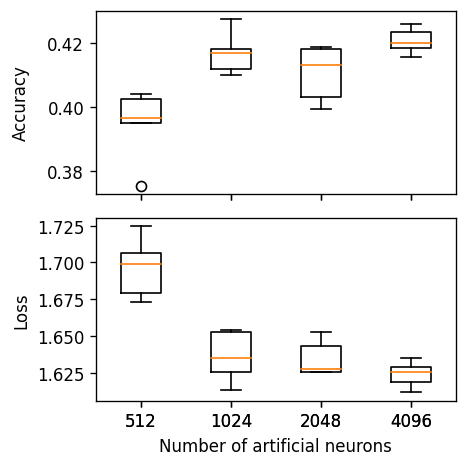

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_neurons in enumerate([512,1024,2048,4096]):
    sample = df[(df['n_neurons'] == n_neurons) & (df['n_layers'] == 1) & (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[512,1024,2048,4096])
ax[1].boxplot(losses, labels=[512,1024,2048,4096])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of artificial neurons')
fig.align_ylabels()
plt.tight_layout()


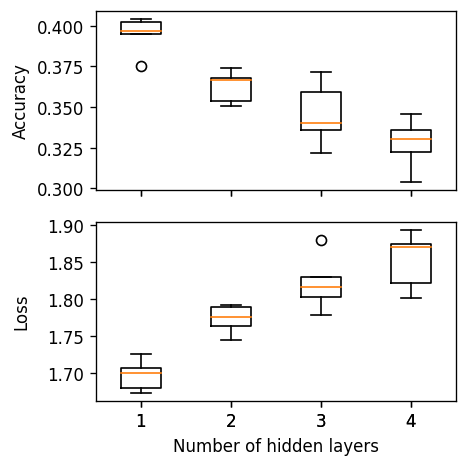

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_layers in enumerate([1,2,3,4]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == n_layers)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[1,2,3,4])
ax[1].boxplot(losses, labels=[1,2,3,4])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of hidden layers')
fig.align_ylabels()
plt.tight_layout()

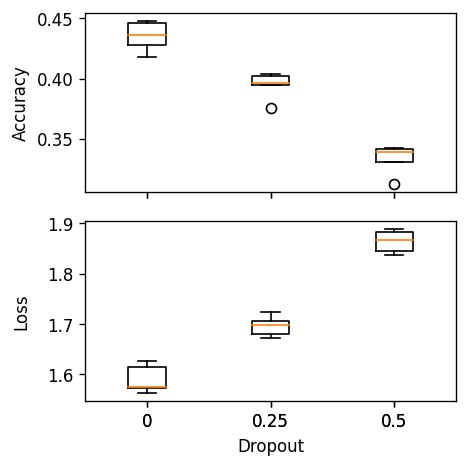

In [ ]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, dropout in enumerate([0, 0.25, 0.5]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == dropout) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[0,0.25,0.5])
ax[1].boxplot(losses, labels=[0,0.25,0.5])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Dropout')
fig.align_ylabels()
plt.tight_layout()

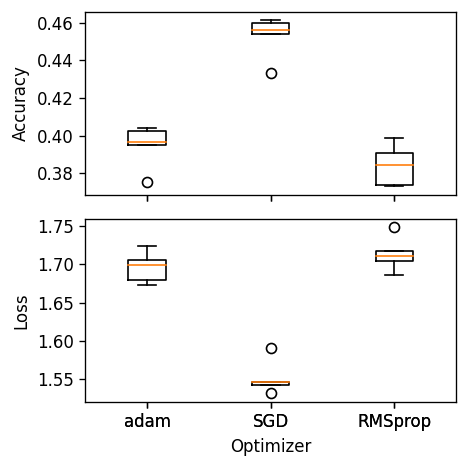

In [ ]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, optimizer in enumerate(['adam','SGD','RMSprop']):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == optimizer) & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=['adam','SGD','RMSprop'])
ax[1].boxplot(losses, labels=['adam','SGD','RMSprop'])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Optimizer')
fig.align_ylabels()
plt.tight_layout()

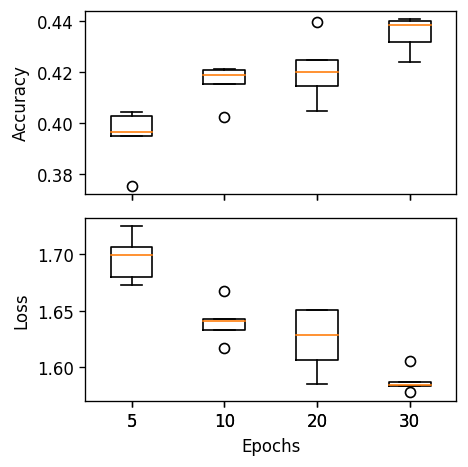

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, epochs in enumerate([5,10,20,30]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == epochs)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[5,10,20,30])
ax[1].boxplot(losses, labels=[5,10,20,30])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
fig.align_ylabels()
plt.tight_layout()

In [ ]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=4096,
                       n_layers=1,
                       dropout=0,
                       optimizer='sgd',
                       epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8265 - accuracy: 0.3523
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6445 - accuracy: 0.4255
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5684 - accuracy: 0.4530
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5147 - accuracy: 0.4714
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4703 - accuracy: 0.4864
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4336 - accuracy: 0.5008
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4014 - accuracy: 0.5103
Epoch 8/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3698 - accuracy: 0.5238
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3440 - accuracy: 0.5335
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.318

In [ ]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=8192,
                       n_layers=1,
                       dropout=0,
                       optimizer='sgd',
                       epochs=60)

Epoch 1/60
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8191 - accuracy: 0.3570
Epoch 2/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6370 - accuracy: 0.4268
Epoch 3/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5591 - accuracy: 0.4577
Epoch 4/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5036 - accuracy: 0.4759
Epoch 5/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4612 - accuracy: 0.4903
Epoch 6/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4211 - accuracy: 0.5036
Epoch 7/60
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3872 - accuracy: 0.5168
Epoch 8/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3566 - accuracy: 0.5292
Epoch 9/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3322 - accuracy: 0.5380
Epoch 10/60
1563/1563 [==============================] - 11s 7ms/step - l

**Análise:**

&emsp; Para definir os melhores hiperparâmetros de números de neurônios, números de camadas intermediárias, número de épocas, quantidade de *dropout* e o otimizador, foram observados os quartis e amplitudes dos *boxplots*, com a acurácia e erro de cada possível variação. Assim, foram definidos:

* Número de neurônios: Inicialmente, a melhor acurácia foi observada com 4096 neurônios. No entanto, ao realizar um teste rápido, dobrando essa quantidade para 8192 neurônios, foi obtido um resultado de acurácia ainda melhor. Isso indica que, devido à complexidade do problema, uma quantidade maior de neurônios é mais adequada.

* Número de *layers*: Um modelo com uma única camada intermediária obteve a melhor média de acurácia e o menor erro.

* Número do *dropout*: O melhor desempenho foi com o *dropout* de 0, isso faz sentido uma vez que pela complexidade do problema estamos com mais probabilidade de *underfitting*.

* Otimizador: O otimizador "SGD" gerou o melhor resultado em termos de acurácia e erro.

* Número de épocas: Inicialmente, 30 épocas apresentaram o melhor desempenho. No entanto, ao dobrar essa quantidade juntamente com o aumento para 8192 neurônios, uma acurácia ainda melhor foi alcançada. Isso sugere que um maior número de épocas é benéfico para a convergência do modelo, especialmente com uma complexidade maior.

&emsp; Os resultados fazem sentido considerando a complexidade do conjunto de dados CIFAR-10. Com uma variedade de classes e imagens complexas, modelos mais robustos são necessários, justificando a escolha de mais neurônios, principalmente por utilizar uma única camada intermediária. A taxa de *dropout* de 0 indica que há mais probabilidade de *underfitting*, exigindo menos regularização. O otimizador SGD pode ser mais eficaz devido à sua simplicidade e capacidade de lidar com grandes conjuntos de dados. Um número maior de épocas é necessário para permitir que o modelo aprenda melhor as representações complexas dos dados.